<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scan-Matching-Using-SVD" data-toc-modified-id="Scan-Matching-Using-SVD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scan Matching Using SVD</a></span><ul class="toc-item"><li><span><a href="#Load-Laser-Data" data-toc-modified-id="Load-Laser-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Laser Data</a></span></li><li><span><a href="#Generate-Transformed-Laser-Data" data-toc-modified-id="Generate-Transformed-Laser-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Generate Transformed Laser Data</a></span></li><li><span><a href="#Calculate-Rotation" data-toc-modified-id="Calculate-Rotation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculate Rotation</a></span></li><li><span><a href="#Calculate-Translation" data-toc-modified-id="Calculate-Translation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Calculate Translation</a></span></li><li><span><a href="#Calculate-Robot-Pose-Correction" data-toc-modified-id="Calculate-Robot-Pose-Correction-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calculate Robot Pose Correction</a></span></li></ul></li></ul></div>

# Scan Matching Using SVD

In [124]:
import numpy as np
import matplotlib.pyplot as plt

## Load Laser Data

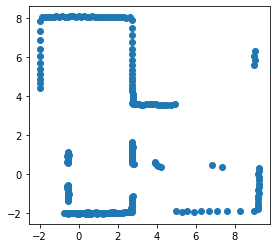

In [125]:
angle_min = -2.35619449615
angle_max = 2.35619449615
angle_increment = 0.0174532923847
range_max = 15.0
ranges = np.load("laserdata.npy")

x = ranges * np.cos(np.arange(angle_min, angle_max, angle_increment))
y = ranges * np.sin(np.arange(angle_min, angle_max, angle_increment))
pc1 = np.stack([x,y])
_=plt.scatter(pc[0], pc[1])
_=plt.gca().set_aspect('equal')

## Generate Transformed Laser Data

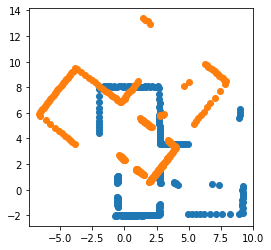

In [150]:
rotation = 0.9
translation = [0.8, 2.4]
R = [ [np.cos(rotation), -np.sin(rotation)], [np.sin(rotation), np.cos(rotation)] ]

pc2 = np.matmul(R, pc1)
pc2 += np.array(translation).reshape(-1, 1)
_=plt.scatter(pc1[0], pc1[1])
_=plt.scatter(pc2[0], pc2[1])
_=plt.gca().set_aspect('equal')

## Calculate Rotation

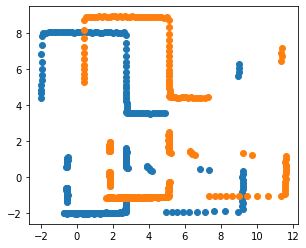

In [151]:
mu_pc1 = np.mean(pc1, axis=1)
mu_pc2 = np.mean(pc2, axis=1)
pc1_norm = pc1 - mu_pc1.reshape(-1, 1)
pc2_norm = pc2 - mu_pc2.reshape(-1, 1)
W = np.matmul(pc2_norm, pc1_norm.T)                         # calculate cross-covariance
u, s, v_T = np.linalg.svd(W, full_matrices=True)            # decompose using SVD

R = np.matmul(v_T.T, u.T)                                   # calculate rotation
pc3 = np.matmul(R, pc2)

_=plt.scatter(pc1[0], pc1[1])
_=plt.scatter(pc3[0], pc3[1])
_=plt.gca().set_aspect('equal')

## Calculate Translation

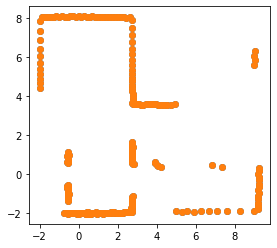

In [152]:
T = mu_pc1 - np.matmul(R, mu_pc2)                           # calculate translation
pc4 = pc3 + T.reshape(-1, 1)

_=plt.scatter(pc1[0], pc1[1])
_=plt.scatter(pc4[0], pc4[1])
_=plt.gca().set_aspect('equal')

## Calculate Robot Pose Correction

In [147]:
# translation of the robot:
T @ R

array([-0.8, -2.4])

In [148]:
# rotation of the robot:
np.arctan2(R[1,0], R[0,0])

2.6415926535897936